In [1]:
from rewann.tools import load_series_stats, mean_comparison
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

# Results on Iris task using lognormal propability distributions to sample weights

In [3]:
def load_trial(t_dir):
    return load_series_stats(f"../data/iris_lognormal/{t_dir}")

In [4]:
trial_1 = load_trial('trial 1')
trial_2 = load_trial('trial 2')
df = pd.concat([trial_2, trial_1])
df = df.sort_values(by=['distribution/mean', 'distribution/sigma', 'seed'])

In [5]:
mu_df = df[df['distribution/sigma'] >= 1].copy()

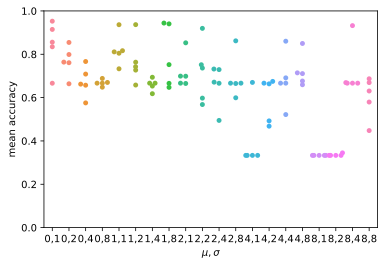

In [6]:
mu_df['mean,sigma'] = mu_df.agg('{0[distribution/mean]},{0[distribution/sigma]:.0f}'.format, axis=1)
sns.swarmplot(x="mean,sigma", y="mean accuracy", data=mu_df)
plt.xlabel('$\mu,\sigma$')
plt.ylim([0,1])
plt.show()

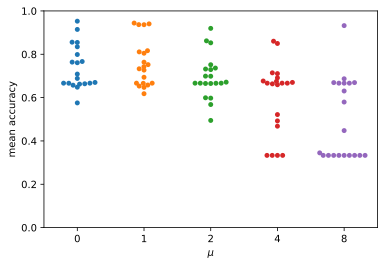

In [7]:
sns.swarmplot(x="distribution/mean", y="mean accuracy", data=mu_df)
plt.ylim([0,1])
plt.xlabel('$\mu$')
plt.show()

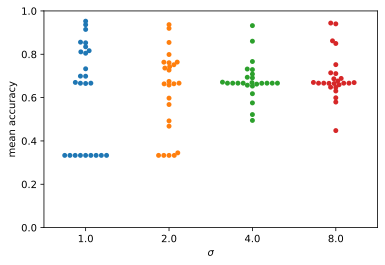

In [8]:
sns.swarmplot(x="distribution/sigma", y="mean accuracy", data=mu_df)
plt.ylim([0,1])
plt.xlabel('$\sigma$')
plt.show()

## Test with smaller $\sigma$ and $\mu=0$

In [9]:
mu0_df = df[df['distribution/mean'] == 0]

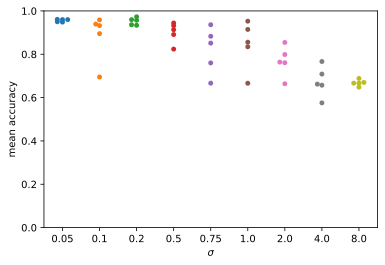

In [10]:
sns.swarmplot(x="distribution/sigma", y="mean accuracy", data=mu0_df)
plt.ylim([0,1])
plt.xlabel('$\sigma$')
plt.show()